In [1]:
import torch
import matplotlib.pyplot as plt
torch. __version__

'2.0.1+cu118'

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


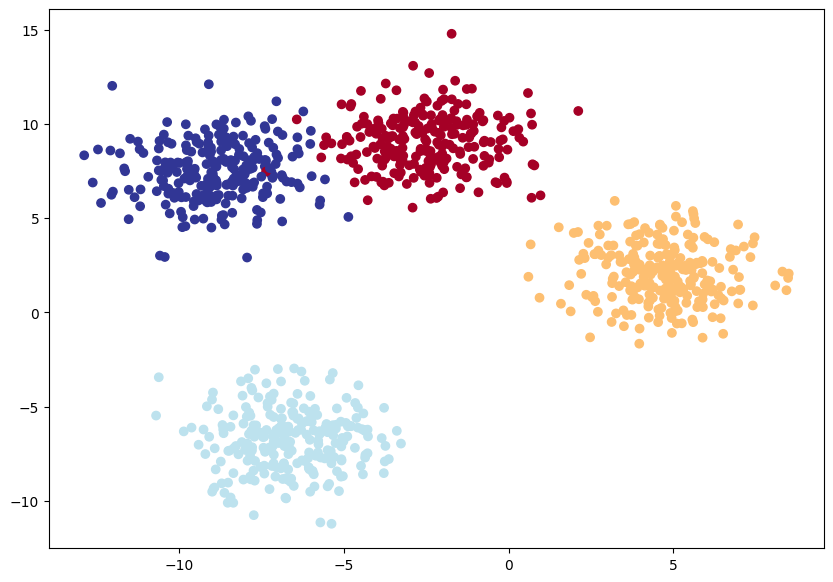

In [27]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### 8.2 Building a multi-class classification model in PyTorch

In [28]:
## setting device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [29]:
from torch import nn

In [30]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Creating a loss function and optimizer for a multi-class PyTorch model

In [31]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), 
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [19]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([200, 2]))

In [22]:
X_blob_test.shape,y_blob_test.shape

(torch.Size([800]), torch.Size([200]))

In [32]:
model_4(X_blob_test.to(device))[:5]

tensor([[-0.4696, -0.4871, -0.1279,  0.0389],
        [ 0.8463, -0.5773,  4.1884, -1.4344],
        [ 0.4698,  1.6712,  0.4922, -0.4062],
        [-0.4154,  0.0484, -0.5473,  0.1254],
        [ 0.0955, -1.2614,  2.5402, -0.7945]], grad_fn=<SliceBackward0>)

In [25]:
model_4(X_blob_train.to(device))[:5]

tensor([[-0.0070, -0.2378, -0.5463, -0.0608],
        [-0.7749,  0.5347,  0.2739, -1.3940],
        [-0.3812, -1.0728,  1.3293,  1.2803],
        [-0.4105, -0.6994,  0.9416,  0.6643],
        [-0.7247,  0.3344,  0.4028, -1.0606]], grad_fn=<SliceBackward0>)

In [33]:
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.4696, -0.4871, -0.1279,  0.0389],
        [ 0.8463, -0.5773,  4.1884, -1.4344],
        [ 0.4698,  1.6712,  0.4922, -0.4062],
        [-0.4154,  0.0484, -0.5473,  0.1254],
        [ 0.0955, -1.2614,  2.5402, -0.7945]], grad_fn=<SliceBackward0>)
tensor([[0.1979, 0.1945, 0.2785, 0.3291],
        [0.0338, 0.0081, 0.9547, 0.0035],
        [0.1735, 0.5768, 0.1774, 0.0723],
        [0.1929, 0.3068, 0.1691, 0.3313],
        [0.0758, 0.0195, 0.8736, 0.0311]], grad_fn=<SliceBackward0>)


In [34]:
# Sum the first sample output of the softmax activation function 
torch.sum(y_pred_probs[0])

tensor(1.0000, grad_fn=<SumBackward0>)

In [35]:
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1979, 0.1945, 0.2785, 0.3291], grad_fn=<SelectBackward0>)
tensor(3)


In [36]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

 Creating a training and testing loop for a multi-class PyTorch model

In [37]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test,  y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  #forward pass
  y_logits = model_4(X_blob_train)
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

  #calculate loss/Accuracy
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train,
                    y_pred = y_preds)
  
  optimizer.zero_grad()

  #backpropogation
  loss.backward()

  optimizer.step()

  ## testing Loop
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim =1).argmax(dim=1)

    #loss/accuracy
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true =y_blob_test,
                           y_pred = test_preds)
    
  if epoch % 10 == 0 :
    print(f"Epoch:{epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}")





Epoch:0 | Loss: 2.89180, Acc: 6.50% | Test Loss: 0.75714, Test Acc: 59.50
Epoch:10 | Loss: 0.18978, Acc: 98.25% | Test Loss: 0.17304, Test Acc: 99.00
Epoch:20 | Loss: 0.09984, Acc: 99.12% | Test Loss: 0.09192, Test Acc: 99.50
Epoch:30 | Loss: 0.07051, Acc: 99.00% | Test Loss: 0.06346, Test Acc: 99.50
Epoch:40 | Loss: 0.05667, Acc: 99.00% | Test Loss: 0.04948, Test Acc: 99.50
Epoch:50 | Loss: 0.04883, Acc: 99.00% | Test Loss: 0.04135, Test Acc: 99.50
Epoch:60 | Loss: 0.04386, Acc: 99.00% | Test Loss: 0.03610, Test Acc: 99.50
Epoch:70 | Loss: 0.04047, Acc: 99.00% | Test Loss: 0.03245, Test Acc: 99.50
Epoch:80 | Loss: 0.03802, Acc: 99.12% | Test Loss: 0.02979, Test Acc: 99.50
Epoch:90 | Loss: 0.03618, Acc: 99.12% | Test Loss: 0.02776, Test Acc: 99.50


### 8.6 Making and evaluating predictions with a PyTorch multi-class model


In [38]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  3.9704,   8.8829, -10.7335,  -8.3741],
        [  3.8562,  -9.7142,   1.9645,   9.3526],
        [ -8.6777, -11.3612,  19.3891,  10.8988],
        [  0.9166,   6.4263,  -5.1012,  -6.0382],
        [  8.0797,   3.2020, -12.2483,  -2.9513],
        [  4.4089, -12.1099,   2.8618,  11.6372],
        [ -9.0031,  -8.7572,  18.0554,   8.4161],
        [  6.7412,  -0.2214,  -8.1961,   0.3094],
        [ -8.8952, -15.7337,  22.6228,  15.0663],
        [  7.0824,   1.0227,  -9.4797,  -0.8758]])

In [39]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")


Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.5%


In [41]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


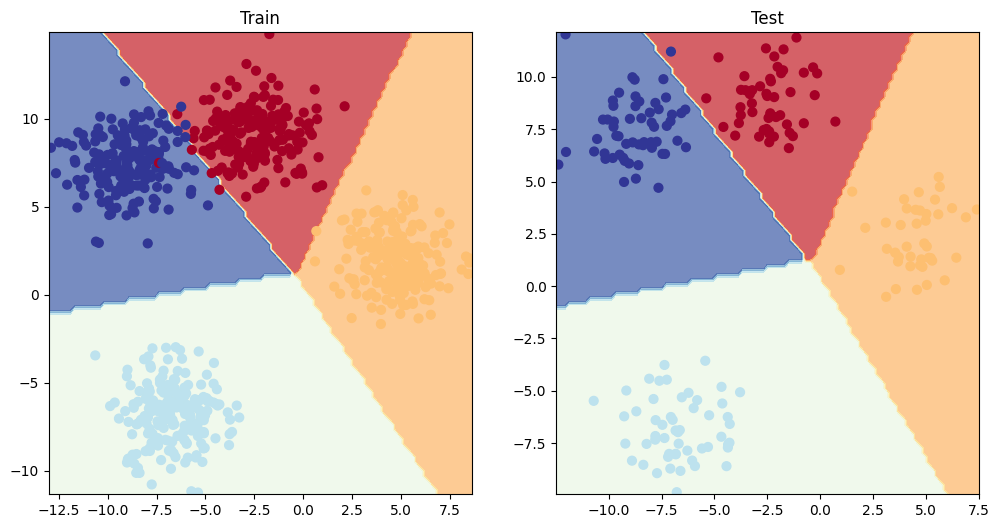

In [42]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)